## Data wrangling

In [47]:
import pandas as pd
import numpy as np
import glob
import preprocessing as pre
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

First we need to extract data from the excel file. In order to construct the eventual for loop, we'll first need to try extracting data from one file

In [2]:
df_eeg = pre.process_all_excel_files()

Reorder columns of df

In [3]:
df_eeg = df_eeg[['id', 'brain_oscillation','freq_band','electrode','fft_abs_power']]

Remove participants (10,18, 52 and 215) because of missing Neuropsy data

In [4]:
df_eeg = df_eeg[(df_eeg.id != '10') & (df_eeg.id != '18') & (df_eeg.id != '52') & (df_eeg.id != '215')]

Verify data wrangling

In [5]:
print(df_eeg.shape)
df_eeg.head(5)

(7372, 5)


,id,brain_oscillation,freq_band,electrode,fft_abs_power
0,134,Delta,1.0-4.0Hz,FP1,15.565495
1,134,Delta,1.0-4.0Hz,FP2,13.945462
2,134,Delta,1.0-4.0Hz,F7,10.874886
3,134,Delta,1.0-4.0Hz,F3,13.581803
4,134,Delta,1.0-4.0Hz,Fz,15.644595


In [6]:
df_eeg.dtypes

id                   object
brain_oscillation    object
freq_band            object
electrode            object
fft_abs_power        object
dtype: object

In [7]:
print('# unique ids: {}'.format(len(df_eeg.id.unique())))
print(df_eeg.id.value_counts())

# unique ids: 97
206    76
403    76
33     76
213    76
13     76
       ..
207    76
26     76
63     76
01     76
07     76
Name: id, Length: 97, dtype: int64


In [8]:
print(df_eeg.electrode.value_counts())
print(df_eeg.brain_oscillation.value_counts())
print(df_eeg.freq_band.value_counts())

F8     388
P4     388
Cz     388
C4     388
F7     388
Pz     388
FP1    388
O2     388
T6     388
O1     388
P3     388
T3     388
F4     388
Fz     388
F3     388
C3     388
T5     388
T4     388
FP2    388
Name: electrode, dtype: int64
Theta    1843
Alpha    1843
Beta     1843
Delta    1843
Name: brain_oscillation, dtype: int64
12.0-25.0Hz    1843
1.0-4.0Hz      1843
8.0-12.0Hz     1843
4.0-8.0Hz      1843
Name: freq_band, dtype: int64


### Merge dataframes (Neuropsy data with df (eeg))

We now need to import the Neuropsydata

In [9]:
df_neuropsy = pd.read_excel("Neuropsy.xlsx", na_values=".")
print(df_neuropsy.shape)
df_neuropsy.head(5)

(100, 13)


,ID,Age,Gender,cIM,cHR,cIE,cSC,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,1,21,1,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
1,3,20,1,10.0,5.0,13.0,1.0,27.0,34.0,41.0,25.0,31.0,38.0
2,4,18,1,26.0,17.0,7.0,15.0,93.0,89.0,96.0,90.0,92.0,90.0
3,7,23,1,24.0,8.0,6.0,14.0,86.0,66.0,112.0,94.0,90.0,100.0
4,10,18,1,NaN,NaN,NaN,NaN,98.0,103.0,93.0,92.0,100.0,85.0


Then remove participants (10,18, 52 and 215) because of missing Neuropsy data

In [10]:
df_neuropsy= df_neuropsy.dropna(axis=0, how='any')

Verify it worked

In [11]:
print(df_neuropsy.shape)

(96, 13)


Rename ID variable

In [12]:
#rename id so it can be merged and fft_abs_power
df_neuropsy.rename(columns = {'ID':'id'}, inplace = True) #rename id so it can be merged
df_neuropsy.head(5)

,id,Age,Gender,cIM,cHR,cIE,cSC,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,1,21,1,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
1,3,20,1,10.0,5.0,13.0,1.0,27.0,34.0,41.0,25.0,31.0,38.0
2,4,18,1,26.0,17.0,7.0,15.0,93.0,89.0,96.0,90.0,92.0,90.0
3,7,23,1,24.0,8.0,6.0,14.0,86.0,66.0,112.0,94.0,90.0,100.0
5,11,21,1,16.0,26.0,13.0,10.0,45.0,33.0,78.0,69.0,51.0,94.0


#### Now let's merge the two dataframes together

In [13]:
 #change dtype of id column from df
df_eeg['id']=df_eeg['id'].astype(int)

In [14]:
df_full = pd.merge(left=df_eeg, right=df_neuropsy, left_on='id', right_on='id')

In [15]:
df_full.head()

,id,brain_oscillation,freq_band,electrode,fft_abs_power,Age,Gender,cIM,cHR,cIE,cSC,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,134,Delta,1.0-4.0Hz,FP1,15.565495,17,1,18.0,3.0,6.0,6.0,85.0,91.0,81.0,91.0,90.0,94.0
1,134,Delta,1.0-4.0Hz,FP2,13.945462,17,1,18.0,3.0,6.0,6.0,85.0,91.0,81.0,91.0,90.0,94.0
2,134,Delta,1.0-4.0Hz,F7,10.874886,17,1,18.0,3.0,6.0,6.0,85.0,91.0,81.0,91.0,90.0,94.0
3,134,Delta,1.0-4.0Hz,F3,13.581803,17,1,18.0,3.0,6.0,6.0,85.0,91.0,81.0,91.0,90.0,94.0
4,134,Delta,1.0-4.0Hz,Fz,15.644595,17,1,18.0,3.0,6.0,6.0,85.0,91.0,81.0,91.0,90.0,94.0


In [16]:
#sort by ids
df_full = df_full.sort_values(by=['id'])

In [17]:
#Reorder columns 
df_full = df_full[['id','Age', 'Gender','brain_oscillation','electrode','fft_abs_power', 'cIM', 'cHR', 'cIE', 'cSC', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']]
df_full.head()

,id,Age,Gender,brain_oscillation,electrode,fft_abs_power,cIM,cHR,cIE,cSC,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
6457,1,21,1,Beta,T6,4.664137,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
6437,1,21,1,Alpha,P4,14.986348,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
6436,1,21,1,Alpha,Pz,17.861620,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
6435,1,21,1,Alpha,P3,15.938140,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0
6434,1,21,1,Alpha,T5,7.362967,17.0,31.0,29.0,9.0,90.0,91.0,92.0,94.0,80.0,110.0


Adjust data types in dataframe

In [18]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7296 entries, 6457 to 3873
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7296 non-null   int64  
 1   Age                7296 non-null   int64  
 2   Gender             7296 non-null   int64  
 3   brain_oscillation  7296 non-null   object 
 4   electrode          7296 non-null   object 
 5   fft_abs_power      7296 non-null   object 
 6   cIM                7296 non-null   float64
 7   cHR                7296 non-null   float64
 8   cIE                7296 non-null   float64
 9   cSC                7296 non-null   float64
 10  Aqtot              7296 non-null   float64
 11  Aqaudi             7296 non-null   float64
 12  Aqvis              7296 non-null   float64
 13  RCQtot             7296 non-null   float64
 14  RCQaudi            7296 non-null   float64
 15  RCQvis             7296 non-null   float64
dtypes: float64(10), int64

In [19]:
df_full['fft_abs_power'] = df_full['fft_abs_power'].astype(float)
print(df_full.dtypes)

id                     int64
Age                    int64
Gender                 int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
cIM                  float64
cHR                  float64
cIE                  float64
cSC                  float64
Aqtot                float64
Aqaudi               float64
Aqvis                float64
RCQtot               float64
RCQaudi              float64
RCQvis               float64
dtype: object


## Descriptive statistics

#### Check for missing values

In [20]:
print(df_full.isnull().values.any())
print(df_full.isnull().values.sum())

False
0


### Descriptive statistics according to gender (male and female)

Clean dataset and keep variables of interest only

In [56]:
df_analysis = df_full[['Gender','brain_oscillation', 'fft_abs_power', 'cIM', 'cHR', 'cIE', 'cSC', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']]
print(df_analysis.head())

      Gender brain_oscillation  fft_abs_power   cIM   cHR   cIE  cSC  Aqtot  \
6457       1              Beta       4.664137  17.0  31.0  29.0  9.0   90.0   
6437       1             Alpha      14.986348  17.0  31.0  29.0  9.0   90.0   
6436       1             Alpha      17.861620  17.0  31.0  29.0  9.0   90.0   
6435       1             Alpha      15.938140  17.0  31.0  29.0  9.0   90.0   
6434       1             Alpha       7.362967  17.0  31.0  29.0  9.0   90.0   

      Aqaudi  Aqvis  RCQtot  RCQaudi  RCQvis  
6457    91.0   92.0    94.0     80.0   110.0  
6437    91.0   92.0    94.0     80.0   110.0  
6436    91.0   92.0    94.0     80.0   110.0  
6435    91.0   92.0    94.0     80.0   110.0  
6434    91.0   92.0    94.0     80.0   110.0  


### Description statistics by gender 

In [41]:
df_analysis.groupby(['Gender', 'brain_oscillation']).describe()

fft_abs_power                                  \
                                 count       mean        std       min   
Gender brain_oscillation                                                 
1      Alpha                    1083.0  12.443215  16.468519  0.832390   
       Beta                     1083.0  11.313650  10.134623  1.683068   
       Delta                    1083.0  13.766580   6.799273  2.722910   
       Theta                    1083.0   8.969600   5.476438  1.270426   
2      Alpha                     741.0  15.069467  23.046294  0.818976   
       Beta                      741.0   7.966775   5.095113  1.319401   
       Delta                     741.0  12.187028   7.544434  2.363218   
       Theta                     741.0   9.037577   8.017893  1.348965   

                                                                         cIM  \
                               25%        50%        75%         max   count   
Gender brain_oscillation                                                       
1      Alpha              4.035082   7.087085  13.598982  181.820101  1083.0   
       Beta               5.653797   8.779399  13.547690  120.919824  1083.0   
       Delta              9.085052  12.565857  17.107160   83.603697  1083.0   
       Theta              5.142222   7.654293  11.070401   35.778731  1083.0   
2      Alpha              3.664430   7.431509  16.513614  258.114724   741.0   
       Beta               4.645349   6.663302   9.705918   41.659246   741.0   
       Delta              7.243324  10.514366  14.992159   78.432796   741.0   
       Theta              4.231535   6.757690  10.879996   75.112935   741.0   

                                     ... RCQaudi         RCQvis             \
                               mean  ...     75%    max   count       mean   
Gender brain_oscillation             ...                                     
1      Alpha              22.701754  ...    90.0  122.0  1083.0  74.614035   
       Beta               22.701754  ...    90.0  122.0  1083.0  74.614035   
       Delta              22.701754  ...    90.0  122.0  1083.0  74.614035   
       Theta              22.701754  ...    90.0  122.0  1083.0  74.614035   
2      Alpha              20.589744  ...    97.0  132.0   741.0  72.153846   
       Beta               20.589744  ...    97.0  132.0   741.0  72.153846   
       Delta              20.589744  ...    97.0  132.0   741.0  72.153846   
       Theta              20.589744  ...    97.0  132.0   741.0  72.153846   

                                                                    
                                std   min   25%   50%   75%    max  
Gender brain_oscillation                                            
1      Alpha              24.253945  33.0  56.0  67.0  94.0  122.0  
       Beta               24.253945  33.0  56.0  67.0  94.0  122.0  
       Delta              24.253945  33.0  56.0  67.0  94.0  122.0  
       Theta              24.253945  33.0  56.0  67.0  94.0  122.0  
2      Alpha              24.721652   8.0  55.0  75.0  93.0  111.0  
       Beta               24.721652   8.0  55.0  75.0  93.0  111.0  
       Delta              24.721652   8.0  55.0  75.0  93.0  111.0  
       Theta              24.721652   8.0  55.0  75.0  93.0  111.0  

[8 rows x 88 columns]

### Correlation matrix for each freq band

#### Alpha

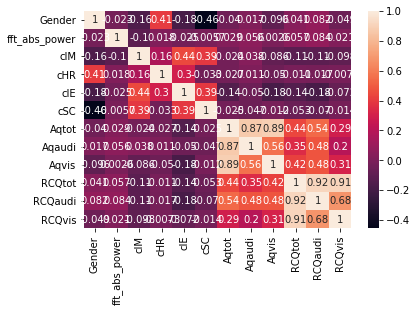

In [58]:
### Not adjusted

heatmap_alpha = df_analysis.corr()
sn.heatmap(heatmap_alpha, annot=True)
plt.show()